In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ppl = pd.read_csv('Traffic_Crashes_-_People.csv')
df_cars = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df_crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_crashes.columns = df_crashes.columns.str.strip().str.lower()
df_cars.columns = df_cars.columns.str.strip().str.lower()
df_ppl.columns = df_ppl.columns.str.strip().str.lower()

In [5]:
df_crashes[['street_direction', 'street_name']] = df_crashes[['street_direction', 'street_name']].astype(str)
df_crashes['street']= df_crashes['street_direction'] + ' ' + df_crashes['street_name']

df_crashes['crash_year'] = pd.DatetimeIndex(df_crashes['crash_date']).year

newdf = df_ppl[(df_ppl.person_type == "DRIVER")]

m1 = pd.merge(df_cars, newdf, how='left', on=['crash_record_id'])


m2 = pd.merge(m1, df_crashes, how='left', on=['crash_record_id'])


df = m2.drop_duplicates(subset=['crash_record_id'], keep='first')
df


,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,Na

In [6]:
df['injury'] = df['injuries_total'] >= 1
df['injury'] = df['injury'].astype(int)
df_injury = df[df['injuries_total'] >= 1]

<ipython-input-6-113da38eed65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury'] = df['injuries_total'] >= 1
<ipython-input-6-113da38eed65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury'] = df['injury'].astype(int)


In [69]:
df_weekday = df[(df['crash_day_of_week'] >= 2) & (df['crash_day_of_week'] <= 6)]
df_weekday['crash_day_of_week'].value_counts()

6    44787
5    39791
3    39011
4    38975
2    37222
Name: crash_day_of_week, dtype: int64

<AxesSubplot:xlabel='crash_hour'>

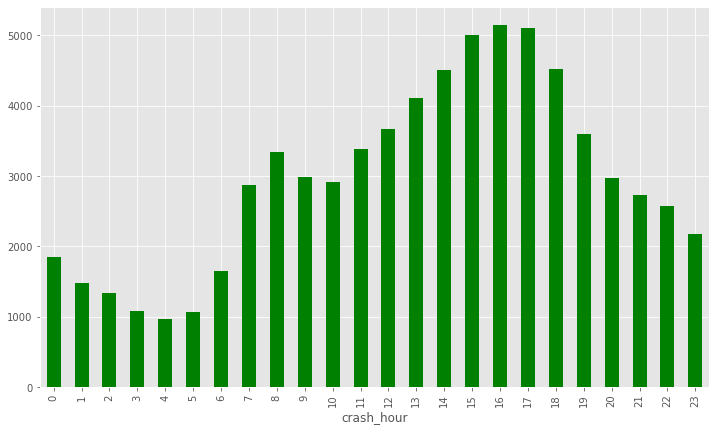

In [9]:
plt.style.use('ggplot')

accidents_by_hour = df_injury.groupby(df_injury['crash_hour']).count()
accidents_by_hour = accidents_by_hour['crash_date_x']
accidents_by_hour.plot(kind='bar', figsize=(12,7), color = 'green')

In [70]:
accidents_week = df_weekday.groupby(df_weekday['crash_hour']).count()['crash_date_x']

In [79]:
accidents_week

crash_hour
0      2711
1      1987
2      1557
3      1190
4      1252
5      2295
6      4984
7     10852
8     13511
9     10678
10     9712
11    10723
12    11337
13    11748
14    12933
15    15699
16    16492
17    16299
18    12861
19     8890
20     6768
21     5788
22     5224
23     4295
Name: crash_date_x, dtype: int64

In [92]:
type(hours)

list

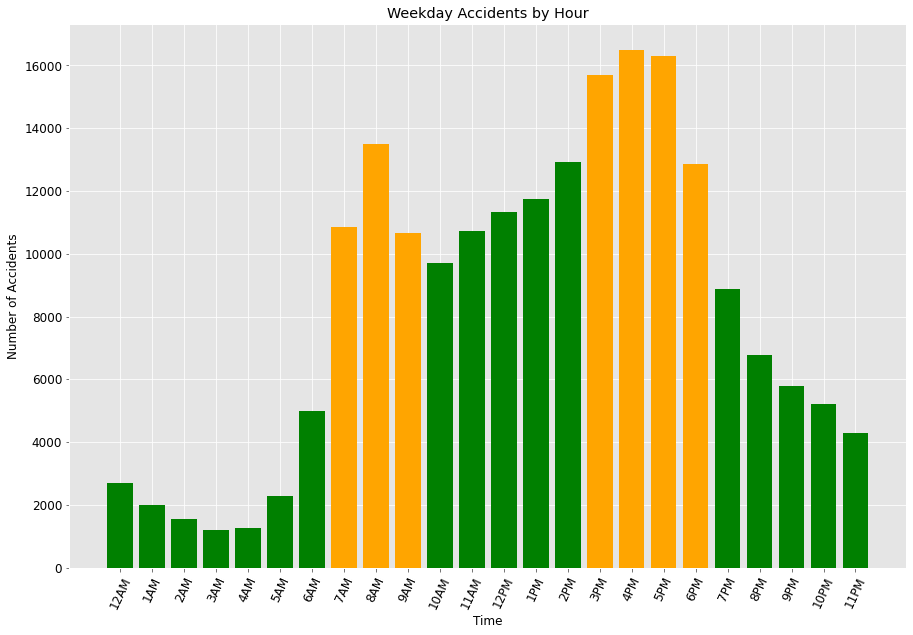

In [132]:
import datetime as dt
hours = ('12AM', '1AM', '2AM', '3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM')
crashes = [2711, 1987, 1557, 1190, 1252, 2295, 4984, 10852,
           13511, 10678, 9712, 10723, 11337, 11748, 12933, 
           15699, 16492, 16299, 12861, 8890, 6768, 5788, 5224, 4295]
plt.subplots(figsize=(15, 10))  
plt.xticks(rotation= 65, fontsize='large', c = 'black')
plt.yticks(c = 'black', fontsize='large')
plt.bar(hours, crashes, color = ['green', 'green', 'green','green','green','green','green','orange','orange','orange','green','green','green','green','green','orange','orange','orange','orange', 'green','green','green',])   

plt.title('Weekday Accidents by Hour')
plt.xlabel('Time', c='black')
plt.ylabel("Number of Accidents", c='black');



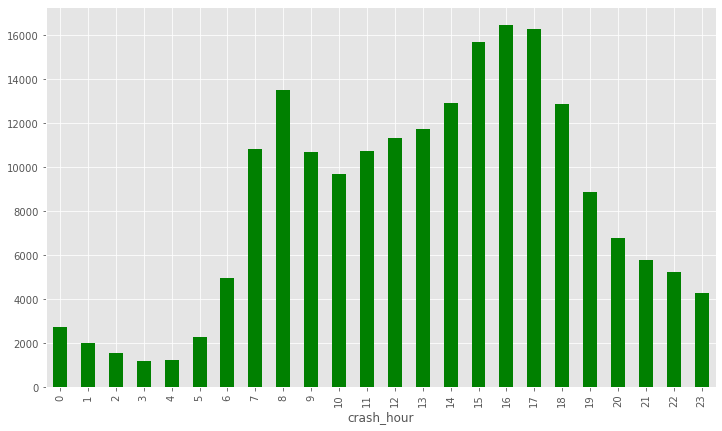

In [82]:
accidents_week.plot(kind='bar', figsize=(12,7), color = 'green');

In [11]:
cause_dict = {'FAILING TO YIELD RIGHT-OF-WAY': 'Breaking Rules of Road',
              'IMPROPER LANE USAGE': 'Reckless/Poor Driving',
             'DISREGARDING TRAFFIC SIGNALS' : 'Breaking Rules of Road',
             'IMPROPER TURNING/NO SIGNAL': 'Reckless/Poor Driving',
              'DISREGARDING STOP SIGN' : 'Breaking Rules of Road',
             'DISREGARDING OTHER TRAFFIC SIGNS': 'Breaking Rules of Road',
             'DISREGARDING ROAD MARKINGS': 'Breaking Rules of Road',
             'DISREGARDING YIELD SIGN': 'Breaking Rules of Road',
             'PASSING STOPPED SCHOOL BUS': 'Breaking Rules of Road',
             'TURNING RIGHT ON RED': 'Breaking Rules of Road',
              'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed Related',
              'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed Related',
              'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed Related',
              'FOLLOWING TOO CLOSELY': 'Reckless/Poor Driving',
              'IMPROPER OVERTAKING/PASSING': 'Reckless/Poor Driving',
              'IMPROPER BACKING': 'Reckless/Poor Driving',
              'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Reckless/Poor Driving',
              'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Reckless/Poor Driving',
              'DRIVING ON WRONG SIDE/WRONG WAY': 'Reckless/Poor Driving',
              'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Drug/Alcohol Related',
              'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Drug/Alcohol Related',
              'PHYSICAL CONDITION OF DRIVER': 'Reckless/Poor Driving',
              'DISTRACTION - FROM INSIDE VEHICLE':'Distracted Driving',
              'CELL PHONE USE OTHER THAN TEXTING':'Distracted Driving',
              'TEXTING':'Distracted Driving',
              'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'Distracted Driving',
              'WEATHER':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION':"Outside World/Out of Driver's Control",
              'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':"Outside World/Out of Driver's Control",
              'DISTRACTION - FROM OUTSIDE VEHICLE':"Outside World/Out of Driver's Control",
              'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':"Outside World/Out of Driver's Control",
              'ROAD CONSTRUCTION/MAINTENANCE':"Outside World/Out of Driver's Control",
              'ANIMAL':"Outside World/Out of Driver's Control",
              'EQUIPMENT - VEHICLE CONDITION': "Outside World/Out of Driver's Control",
              'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':"Outside World/Out of Driver's Control",
              'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT':"Outside World/Out of Driver's Control",
              'UNABLE TO DETERMINE': 'Other/Unknown',
              'NOT APPLICABLE': 'Other/Unknown',
              'OBSTRUCTED CROSSWALKS': 'Other/Unknown',
              'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown',
              'RELATED TO BUS STOP': 'Other/Unknown',
             'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other/Unknown'}

df['Simple_Reason'] = df['prim_contributory_cause'].map(cause_dict)

<ipython-input-11-91d82bd9b51e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Simple_Reason'] = df['prim_contributory_cause'].map(cause_dict)


In [12]:
df

,crash_unit_id,crash_record_id,rd_no_x,crash_date_x,unit_no,unit_type,num_passengers,vehicle_id_x,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,rd_no_y,vehicle_id_y,crash_date_y,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result value,cell_phone_use,rd_no,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,not_right_of_way_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,street,crash_year,injury,Simple_Reason
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,UNKNOWN,IL,2017.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O829999,DRIVER,JD124535,796949.0,01/22/2020 06:25:00 AM,NaN,ACAMPO,CA,95220,M,35.0,CA,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JD124535,NaN,01/22/2020 06:25:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,OTHER NONCOLLISION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",01/22/2020 12:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1525,S,CALIFORNIA BLVD,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,4,1,41.860250,-87.695575,POINT (-87.695575177986 41.860250253825),S CALIFORNIA BLVD,2020,0,Other/Unknown
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,JC451435,Y,09/28/2019 03:30:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFE

In [14]:
df = df[df.road_defect != 'UNKNOWN']
def rd_defect(x):
    if (x == 'NO DEFECTS'):
        return 0
    else:
        return 1

df['road_defect'] = (df['road_defect'].apply(rd_defect))

<ipython-input-14-cf105bc5a761>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['road_defect'] = (df['road_defect'].apply(rd_defect))


In [59]:
def rush_hour(time):
    if ((time >= 7 and time <= 9) or (time >= 15 and time <= 18)):
        return 1
    else:
        return 0
def rush_hour_day(day):
    if (day >= 2 and day <= 6):
        return 1
    else:
        return 0

df['rush_hour'] = (df['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))

<ipython-input-59-97fc8a6f672d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour'] = (df['crash_hour'].apply(rush_hour) & df['crash_day_of_week'].apply(rush_hour_day))


In [17]:
df = df[df.Simple_Reason != 'Other/Unknown']

In [19]:
df['Simple_Reason'].value_counts()

Reckless/Poor Driving                    151143
Breaking Rules of Road                    69518
Speed Related                             23893
Outside World/Out of Driver's Control     19419
Distracted Driving                         4713
Drug/Alcohol Related                       3086
Name: Simple_Reason, dtype: int64

In [22]:

df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)
df_injury = df_injury[df_injury.Simple_Reason != 'Other/Unknown']

<ipython-input-22-1d76835c37b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injury['Simple_Reason'] = df_injury['prim_contributory_cause'].map(cause_dict)


In [30]:
acc_by_reason = df.groupby(df['Simple_Reason']).count()['crash_unit_id']
inj_by_reason = df_injury.groupby(df_injury['Simple_Reason']).count()['crash_unit_id']

In [142]:
total_inj = acc_by_reason.sort_values(ascending=True)

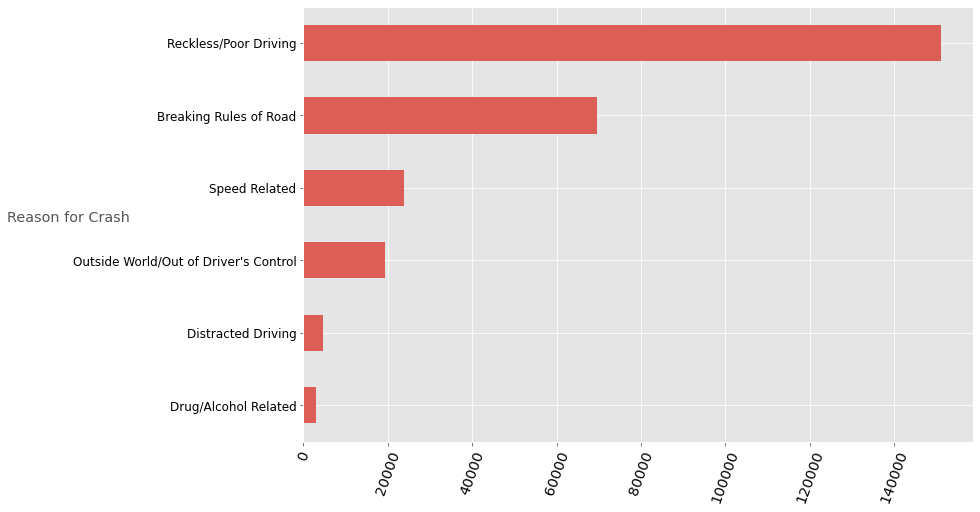

In [143]:
total_inj.plot(kind='barh', figsize=(12,8))

plt.xticks(rotation=70, c='black', fontsize='x-large')
plt.yticks(c='black', fontsize='large')
plt.ylabel('Reason for Crash', rotation = 0, fontsize='x-large');

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Breaking Rules of Road'),
  Text(1, 0, 'Reckless/Poor Driving'),
  Text(2, 0, 'Speed Related'),
  Text(3, 0, "Outside World/Out of Driver's Control"),
  Text(4, 0, 'Distracted Driving'),
  Text(5, 0, 'Drug/Alcohol Related')])

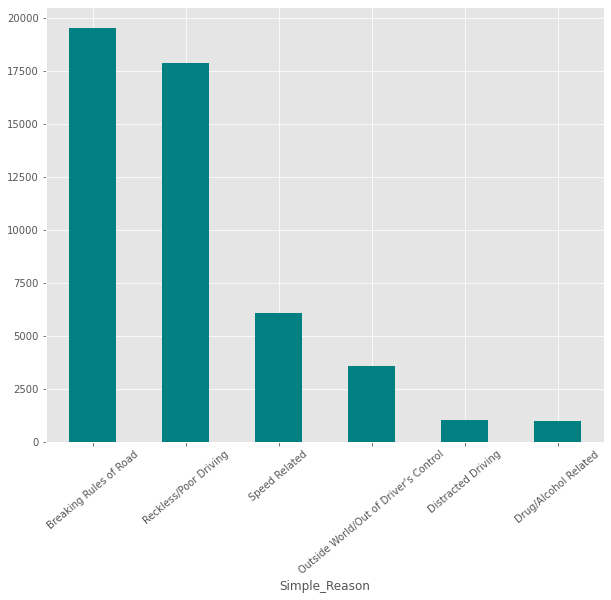

In [52]:
inj_by_reason.sort_values(ascending=False).plot(kind='bar',figsize=(10, 8), color = "teal")

plt.xticks(rotation=40)

In [145]:
reason_for_inj = (inj_by_reason / acc_by_reason).sort_values(ascending=True)

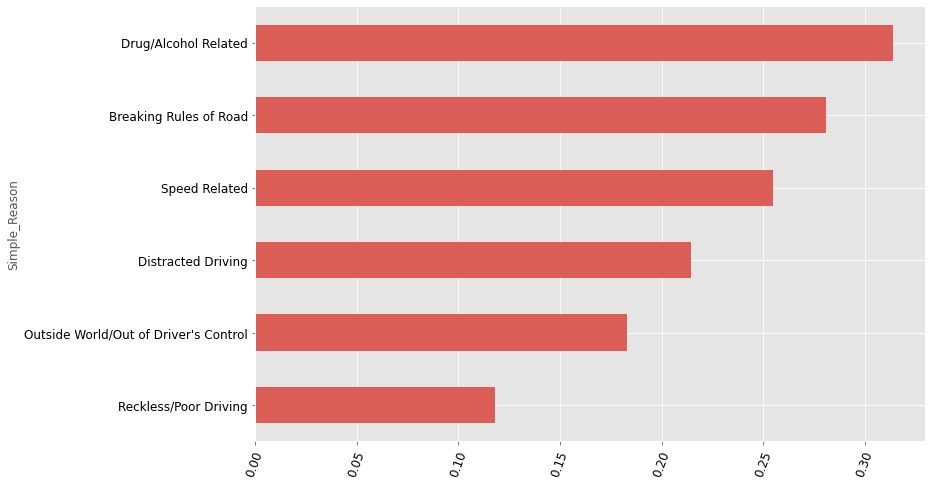

In [146]:
reason_for_inj.plot(kind='barh', figsize = (12, 8))

plt.xticks(rotation=70, c='black', fontsize='large')
plt.yticks(c='black', fontsize='large');

In [60]:
df['rush_hour'].value_counts()

0    175380
1     96392
Name: rush_hour, dtype: int64

''

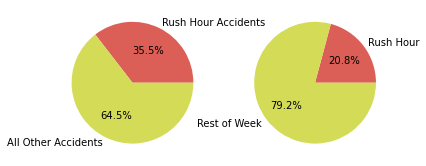

In [67]:
labels = 'Rush Hour Accidents', 'All Other Accidents'
sizes = [96392, 175380]

fig, axes = plt.subplots(1, 2)
axes[0].pie(sizes, labels = labels, autopct='%1.1f%%')
axes[1].pie([35, 133], labels = ('Rush Hour', 'Rest of Week'), autopct='%1.1f%%')
;

In [135]:
df['first_crash_type'].value_counts()

REAR END                        72218
TURNING                         47315
SIDESWIPE SAME DIRECTION        44174
PARKED MOTOR VEHICLE            38250
ANGLE                           35106
FIXED OBJECT                    11376
PEDESTRIAN                       5918
PEDALCYCLIST                     4022
SIDESWIPE OPPOSITE DIRECTION     3905
HEAD ON                          2745
REAR TO FRONT                    2061
OTHER OBJECT                     2017
REAR TO SIDE                     1180
OTHER NONCOLLISION                740
REAR TO REAR                      340
ANIMAL                            227
OVERTURNED                        155
TRAIN                              23
Name: first_crash_type, dtype: int64